# Imports

In [2]:
pip install pyseagull

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seagull as sg
import seagull.lifeforms as lf
import numpy as np

In [4]:
# Some settings to show a JS animation
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"

In [5]:
pip install numpy==1.24

Note: you may need to restart the kernel to use updated packages.


# Glider Gen

2025-04-27 10:17:25.849 | INFO     | seagull.simulator:compute_statistics:128 - Computing simulation statistics...


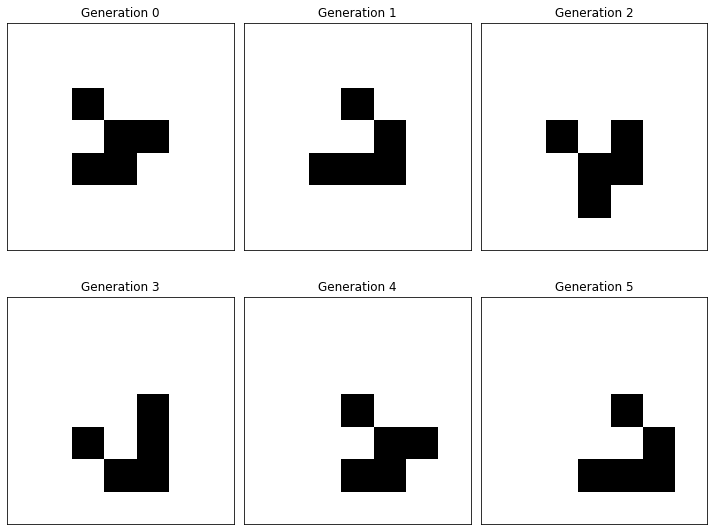

Figure saved as: ../glider_generations_0_to_5.png


In [7]:
# 1. Initialize the board
board_size = (7, 7)
board = sg.Board(size=board_size)

# 2. Add the glider lifeform
glider = lf.Glider()
board.add(glider, loc=(2, 2)) # Start closer to top-left for better visibility

# 3. Create a simulator and run the simulation for 6 generations
sim = sg.Simulator(board)
generations_to_simulate = 6 # Simulate only 6 generations (0 to 5)
sim.run(sg.rules.conway_classic, iters=generations_to_simulate)

# 4. Get the history of the simulation (all frames)
history = sim.get_history()

# 5. Plot the first 6 generations (0 to 5)
fig, axes = plt.subplots(2, 3, figsize=(10, 8)) # Increased figsize height slightly for labels
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i in range(generations_to_simulate):
    if i < len(history): # Ensure we don't try to access beyond history length
        state = history[i]
        ax = axes[i]
        ax.imshow(state, cmap='binary')
        ax.set_title(f"Generation {i}")
        # Remove ticks and labels, but keep the frame (spines)
        ax.set_xticks([])
        ax.set_yticks([])
        # Ensure the border (spines) is visible and set its color
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_edgecolor('black') # Or any other color you prefer
            # spine.set_linewidth(1) # Optional: adjust line width
    else:
        # Hide any unused subplots
        axes[i].axis('off')

plt.tight_layout(pad=1.0) # Adjust layout to prevent titles/labels overlapping

# 6. Save the figure
output_filename = "../glider_generations_0_to_5.png"
plt.savefig(output_filename, bbox_inches='tight', dpi=150)

# 7. Display the figure in the notebook
plt.show()

print(f"Figure saved as: {output_filename}")

# Glider Guns

2025-04-29 17:42:22.098 | INFO     | seagull.simulator:compute_statistics:128 - Computing simulation statistics...


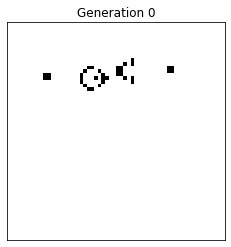

In [22]:
board_size = (60, 60)
board = sg.Board(size=board_size)

gosper_coords = [
    (0, 24), (1, 22), (1, 24), (2, 12), (2, 13), (2, 20), (2, 21), (2, 34), (2, 35),
    (3, 11), (3, 15), (3, 20), (3, 21), (3, 34), (3, 35), (4, 0), (4, 1), (4, 10),
    (4, 16), (4, 20), (4, 21), (5, 0), (5, 1), (5, 10), (5, 14), (5, 16), (5, 17),
    (5, 22), (5, 24), (6, 10), (6, 16), (6, 24), (7, 11), (7, 15), (8, 12), (8, 13)
]

loc = (10, 10)
for r_rel, c_rel in gosper_coords:
    r_abs = loc[0] + r_rel
    c_abs = loc[1] + c_rel
    if 0 <= r_abs < board_size[0] and 0 <= c_abs < board_size[1]:
        board.state[r_abs, c_abs] = 1

sim = sg.Simulator(board)
sim.run(sg.rules.conway_classic, iters=300)

history = sim.get_history()

fig, ax = plt.subplots()

def update(i):
    ax.clear()
    ax.imshow(history[i], cmap='binary')
    ax.set_title(f"Generation {i}")
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor('black')

from matplotlib import animation

ani = animation.FuncAnimation(fig, update, frames=len(history), interval=100)

ani
